In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib as mpl
mpl.style.use('classic')
#This binning with the error calculated in this way is not good if the input data has too few point. 
# For example, if nbins=size(x), error will be 0.
def lin_binning(x,y,nbins): #input: data x,y ; No of points you want nbins  
    #nbins+=1
    x = x[~np.isnan(x)] # remove nan from the data
    y = y[~np.isnan(y)]
    
    n, _ = np.histogram(x, bins=nbins) # n=len(x)/nbins
    meanx= np.histogram(x, bins=nbins, weights=x)[0] / n
    meany= np.histogram(x, bins=nbins, weights=y) [0]/ n
    meany2= np.histogram(x, bins=nbins, weights=y*y)[0] / n
    std_y = np.sqrt(meany2 - meany*meany)/np.sqrt(n)
    
    return meanx,meany,std_y #putput: nbins rows, 3 col

def log_binning(x,y,nbins):
    nbins+=1
    x = x[~np.isnan(x)] # remove nan from the data
    y = y[~np.isnan(y)]
    
    max_x = np.log10(max(x))
    min_x = np.log10(min(x))
    bins = np.logspace(min_x,max_x,num=nbins)
    # Based off of: http://stackoverflow.com/questions/15556930/turn-scatter-data-into-binned-data-with-errors-bars-equal-to-standard-deviation
    bin_no_pts= np.histogram(x, bins)[0] #the no fo data points in every bin
    #print "binning schem:";print bin_no_pts
    bin_means_x = (np.histogram(x,bins,weights=x)[0] / bin_no_pts)
    bin_means_y = (np.histogram(x,bins,weights=y)[0] / bin_no_pts)   
    bin_means_yy = (np.histogram(x,bins,weights=y*y)[0] / bin_no_pts)
    bin_std_y = np.sqrt( bin_means_yy - bin_means_y*bin_means_y)/np.sqrt(bin_no_pts)   

    return bin_means_x,bin_means_y,bin_std_y # output: nbins-rows, 3 cols
figsz=(6.5,5) #fig size
legfs=18 #legend fontsize
axfs=16 # axis label fontsize
tickfs=15# ticklabel fontsize
texfs=16 # annotante/tex fontsize
titfs=18# title fontsize


In [2]:
#1st ZF_1.55-300K
fpath11=r'D:\4_muonSR\NdSmGd2 Zr2O7 PSI Oct 2015\Sm2Zr2O7_GPS\SZO-T1p5_300K_ZF_genExpo_GlobalFit_alpha.dat'
data = np.genfromtxt(fpath11, dtype=None, skip_header=1,delimiter=',')

In [3]:
#1st ZF_1.55-300K
#here input the parameters
#####################
plotNo      =np.array([0,11]) #plot which datasets
datasets    =len(plotNo)#no of data sets to plot
theoryd     =datasets #no theory of data sets
binning_pts =80 # how many binning points
shiftd      =0# shift data by a value

####################
#this code is different form others, for new arragement in the file
dat        = np.zeros((datasets,binning_pts,3)) #3D arrary, page,row,col, to store the binned data
theory_len = np.size(data[~np.isnan(data[:,-1]),-1]) # the datasets*3 th col is the first theory dat
theory     = np.zeros((theory_len,theoryd*2))#  to store 5 sets of the theory dada 

#log binning data
for idx, i in enumerate(5*plotNo): 
    dat[idx,:,:]=np.transpose(lin_binning(data[:,i],data[:,i+1],binning_pts))
    
#shift the data and theory data sucessively
for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
    dat[i,:,1]=dat[i,:,1]+shiftd*i  
    
for idx, i in enumerate(5*plotNo):  
    theory[:,idx*2],theory[:,idx*2+1]=data[:,i+3],data[:,i+4]+shiftd*idx

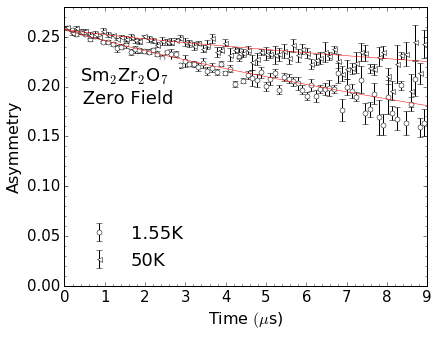

In [19]:
#1st ZF_1.55-300K
#plot data
#here input the parameters
#%matplotlib qt
#####################
plt.figure(figsize=figsz)
fig_label=("1.55K","2.3K","2.9K",'4.1',"5.2K","7.4K","11K","16K","21K","32K","42K",'50K')
tex_pos=np.array([0,0.02,0.04,0.06,0.08,0.17])
markers=("o","<",">","^","o","d")
mkfaceCor=("red","black","blue","green","orange")
#####################
for i, ii in enumerate(plotNo):
    i=np.int(i)
    plt.plot(theory[:,i*2],theory[:,i*2+1],color='red',linewidth=0.5)
    plt.errorbar(dat[i,:,0],dat[i,:,1],dat[i,:,2],color='black', fmt=markers[i],markersize='5', mfc='white',label=fig_label[ii],zorder=1)

ax=plt.gca() 
plt.text(1.5, 0.2,'Sm$_2$Zr$_2$O$_7$ \n Zero Field',size=titfs, ha='center', va='center', backgroundcolor='white',zorder=3,bbox=dict(facecolor='white', alpha=1, edgecolor='white', boxstyle='round'))

plt.xlim(0., 7)
plt.ylim(0., 0.28)

plt.ylabel('Asymmetry',size=axfs)
plt.xlabel(r"Time $(\mu$s)",size=axfs)
plt.xticks( color='k', size=tickfs)
plt.yticks( color='k', size=tickfs)
#plt.minorticks_on()

plt.legend(frameon=False,numpoints=1,loc='best',fontsize=titfs)

#plt.savefig(r'D:\4_muonSR\NdSmGd2 Zr2O7 PSI Oct 2015\Sm2Zr2O7_GPS\SZO_ZF_2Ts_GPS.pdf', bbox_inches="tight",verbose=True)
plt.show()

In [47]:
#decoupling at 1.55K
fpath=r'D:\4_muonSR\NdSmGd2 Zr2O7 PSI Oct 2015\Sm2Zr2O7_GPS\SZO_decoupling0-5kG_1p55K_fit_diffAlfa_lam_beta0-10us.dat'
data = np.genfromtxt(fpath, dtype=None, skip_header=1,delimiter=',')

In [48]:
##2nd 500Gs_1.55-300K
#here input the parameters
#####################
plotNo      =np.array([0,3]) #plot which datasets
datasets    =len(plotNo)#no of data sets to plot
theoryd     =datasets #no theory of data sets
binning_pts =60 # how many binning points
shiftd      =0# shift data by a value

####################
#this code is different form others, for new arragement in the file
dat        = np.zeros((datasets,binning_pts,3)) #3D arrary, page,row,col, to store the binned data
theory_len = np.size(data[~np.isnan(data[:,-1]),-1]) # the datasets*3 th col is the first theory dat
theory     = np.zeros((theory_len,theoryd*2))#  to store 5 sets of the theory dada 

#log binning data
for idx, i in enumerate(5*plotNo): 
    dat[idx,:,:]=np.transpose(lin_binning(data[:,i],data[:,i+1],binning_pts))
    
#shift the data and theory data sucessively
for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
    dat[i,:,1]=dat[i,:,1]+shiftd*i  
    
for idx, i in enumerate(5*plotNo):  
    theory[:,idx*2],theory[:,idx*2+1]=data[:,i+3],data[:,i+4]+shiftd*idx

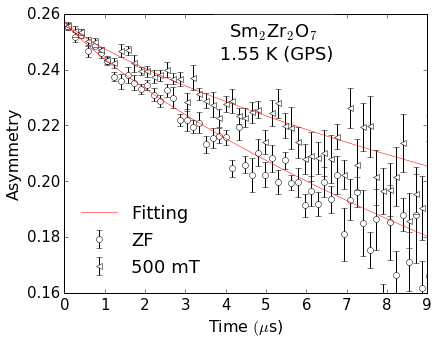

In [52]:
plt.figure(figsize=figsz)
fig_label=("ZF","5 mT","50 mT",'500 mT')
tex_pos=np.array([[1,2,3,4,0.5,0.58],[0.09,0.13,0.18,0.23,0.5,0.58]])
markers=("o","<","s",">","d")
mlcolor=("black","blue","green","orange")
#####################
###### This block plot colorful...
# for idx, i in enumerate(plotNo):
#     plt.errorbar(dat[idx,:,0],dat[idx,:,1],dat[idx,:,2],label=fig_label[i],color=mlcolor[idx], fmt=markers[idx],markersize='6',mfc='white', mec=mlcolor[idx], zorder=1)
#     if idx==0:
#         plt.plot(theory[:,idx*2],theory[:,idx*2+1],color='red',linewidth=2,label='Fitting')
#     else:
#         plt.plot(theory[:,idx*2],theory[:,idx*2+1],color=mlcolor[idx],linewidth=2)
######
for idx, i in enumerate(plotNo):
    plt.errorbar(dat[idx,:,0],dat[idx,:,1],dat[idx,:,2],label=fig_label[i],color='black', fmt=markers[idx],markersize='6', mfc='white', zorder=1)
    if idx==0:
        plt.plot(theory[:,idx*2],theory[:,idx*2+1],color='red',linewidth=0.5,label='Fitting')
    else:
        plt.plot(theory[:,idx*2],theory[:,idx*2+1],color='red',linewidth=0.5) 

plt.text(5.2, 0.25,'Sm$_2$Zr$_2$O$_7$ \n 1.55 K (GPS)',size=titfs, ha='center', va='center', backgroundcolor='white',zorder=3,bbox=dict(facecolor='white', alpha=1, edgecolor='white', boxstyle='round'))

#plt.yscale('log')
plt.xlim(0., 9)
plt.ylim(0.16, 0.26)

leg = plt.legend(loc='best', numpoints=1,frameon=True,framealpha=1,fontsize=legfs,fancybox=True,shadow=False)
leg.get_frame().set_edgecolor('w')


plt.ylabel('Asymmetry',size=axfs)
plt.xlabel(r"Time $(\mu$s)",size=axfs)
plt.xticks(color='k', size=tickfs)
plt.yticks(color='k', size=tickfs)

plt.savefig(r'D:\4_muonSR\NdSmGd2 Zr2O7 PSI Oct 2015\Sm2Zr2O7_GPS\SZO_1p55k_decoup1.pdf', bbox_inches="tight",verbose=True)
plt.show()

In [4]:
#LTF 20-800mK ZF
fpath=r'D:\4_muonSR\NdSmGd2 Zr2O7 PSI Oct 2015\Sm2Zr2O7_LTF\SZO_20-800mK_ZF_fix-diff-silver_globle_fit_alfa_genExpo.dat'
data = np.genfromtxt(fpath, dtype=None, skip_header=1,delimiter=',')

In [5]:
#here input the parameters
#####################
plotNo      =np.array([0,8]) #plot which datasets
datasets    =len(plotNo)#no of data sets to plot
theoryd     =datasets #no theory of data sets
binning_pts =80 # how many binning points
shiftd      =0# shift data by a value

####################
#this code is different form others, for new arragement in the file
dat        = np.zeros((datasets,binning_pts,3)) #3D arrary, page,row,col, to store the binned data
theory_len = np.size(data[~np.isnan(data[:,-1]),-1]) # the datasets*3 th col is the first theory dat
theory     = np.zeros((theory_len,theoryd*2))#  to store 5 sets of the theory dada 

#log binning data
for idx, i in enumerate(5*plotNo): 
    dat[idx,:,:]=np.transpose(lin_binning(data[:,i],data[:,i+1],binning_pts))
    
#shift the data and theory data sucessively
for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
    dat[i,:,1]=dat[i,:,1]+shiftd*i  
    
for idx, i in enumerate(5*plotNo):  
    theory[:,idx*2],theory[:,idx*2+1]=data[:,i+3],data[:,i+4]+shiftd*idx

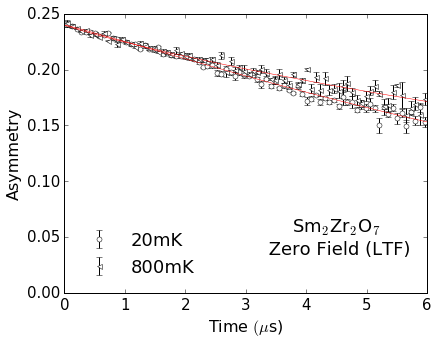

In [6]:
#plot data
#here input the parameters
#%matplotlib qt
#####################
plt.figure(figsize=figsz)
fig_label=("20mK","100mK","200mK",'300mK',"400mK","500mK","600mK","700mK","800mK")
tex_pos=np.array([0,0.02,0.04,0.06,0.08,0.17])
markers=("o","<",">","^","o","d")
mkeCor=('black','black',"blue","green","orange")
#####################
for i, ii in enumerate(plotNo):
    i=np.int(i)
    plt.plot(theory[:,i*2],theory[:,i*2+1],color='red',linewidth=0.5)
    plt.errorbar(dat[i,:,0],dat[i,:,1],dat[i,:,2],color='black', fmt=markers[i],markersize='5',
                 mec=mkeCor[i],ecolor=mkeCor[i], mfc='white',label=fig_label[ii],zorder=1)

ax=plt.gca() 
plt.text(4.5, 0.05,'Sm$_2$Zr$_2$O$_7$ \n Zero Field (LTF)',size=titfs, ha='center', va='center', backgroundcolor='white',zorder=3,bbox=dict(facecolor='white', alpha=1, edgecolor='white', boxstyle='round'))

plt.xlim(0., 6)
plt.ylim(0., 0.25)


plt.ylabel('Asymmetry',size=axfs)
plt.xlabel(r"Time $(\mu$s)",size=axfs)
plt.xticks( color='k', size=tickfs)
plt.yticks( color='k', size=tickfs)
#plt.minorticks_on()

plt.legend(frameon=False,numpoints=1,loc='best',fontsize=titfs)

#plt.savefig(r'D:\4_muonSR\NdSmGd2 Zr2O7 PSI Oct 2015\Sm2Zr2O7_LTF\SZO_20-800mK_ZF_fix-diff-silver_globle_fit_alfa_genExpo.pdf', bbox_inches="tight",verbose=True)
plt.show()

In [6]:
#LTF 20 decoupling
fpath=r'D:\4_muonSR\NdSmGd2 Zr2O7 PSI Oct 2015\Sm2Zr2O7_LTF\SZO_decouple_20mk_genExp_fit-diff-alfa0-9us.dat'
data = np.genfromtxt(fpath, dtype=None, skip_header=1,delimiter=',')

In [7]:
#here input the parameters
#####################
plotNo      =np.array([0,1,6]) #plot which datasets
datasets    =len(plotNo)#no of data sets to plot
theoryd     =datasets #no theory of data sets
binning_pts =60 # how many binning points
shiftd      =0# shift data by a value

####################
#this code is different form others, for new arragement in the file
dat        = np.zeros((datasets,binning_pts,3)) #3D arrary, page,row,col, to store the binned data
theory_len = np.size(data[~np.isnan(data[:,-1]),-1]) # the datasets*3 th col is the first theory dat
theory     = np.zeros((theory_len,theoryd*2))#  to store 5 sets of the theory dada 

#log binning data
for idx, i in enumerate(5*plotNo): 
    dat[idx,:,:]=np.transpose(lin_binning(data[:,i],data[:,i+1],binning_pts))
    
#shift the data and theory data sucessively
for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
    dat[i,:,1]=dat[i,:,1]+shiftd*i  
    
for idx, i in enumerate(5*plotNo):  
    theory[:,idx*2],theory[:,idx*2+1]=data[:,i+3],data[:,i+4]+shiftd*idx

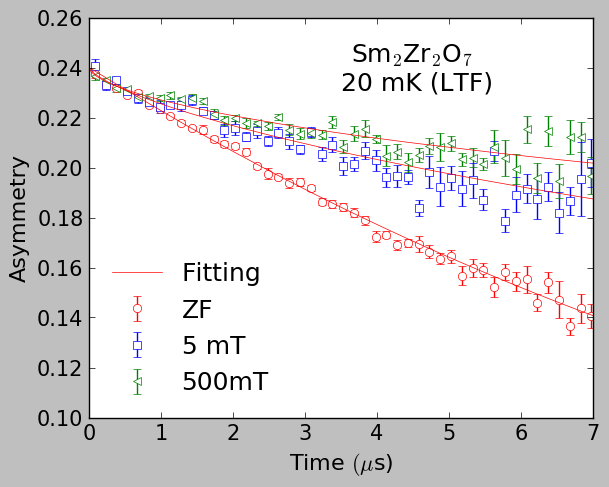

In [16]:
plt.figure(figsize=figsz)
fig_label=("ZF","5 mT","10 mT",'20 mT','80mT','200mT','500mT','1T','1.4T')
tex_pos=np.array([[1,2,3,4,0.5,0.58],[0.09,0.13,0.18,0.23,0.5,0.58]])
markers=("o",'s',"<",">","s","d")
mlcolor=("red","blue","green","orange","black")
#####################
for idx, i in enumerate(plotNo):
    plt.errorbar(dat[idx,:,0],dat[idx,:,1],dat[idx,:,2],label=fig_label[i],
                 mec=mlcolor[idx],ecolor=mlcolor[idx], fmt=markers[idx],markersize='6', mfc='white', zorder=1)
    if idx==0:
        plt.plot(theory[:,idx*2],theory[:,idx*2+1],color='red',linewidth=0.5,label='Fitting')
    else:
        plt.plot(theory[:,idx*2],theory[:,idx*2+1],color='red',linewidth=0.5) 

plt.text(4.5, 0.24,'Sm$_2$Zr$_2$O$_7$ \n 20 mK (LTF)',size=titfs, ha='center', va='center', backgroundcolor='white',zorder=3,bbox=dict(facecolor='white', alpha=1, edgecolor='white', boxstyle='round'))

#plt.yscale('log')
plt.xlim(0., 7)
plt.ylim(0.1, 0.26)

leg = plt.legend(loc='best', numpoints=1,frameon=True,framealpha=1,fontsize=legfs,fancybox=True,shadow=False)
leg.get_frame().set_edgecolor('w')


plt.ylabel('Asymmetry',size=axfs)
plt.xlabel(r"Time $(\mu$s)",size=axfs)
plt.xticks( color='k', size=tickfs)
plt.yticks( color='k', size=tickfs)

plt.savefig(r'D:\4_muonSR\NdSmGd2 Zr2O7 PSI Oct 2015\Sm2Zr2O7_LTF\SZO_decouple_20mk_genExp_fit-diff-alfa2.pdf', bbox_inches="tight",verbose=True)
plt.show()

## Normalize and Plot GPS and LTF data together 
#(the silver damping is ignored in the plot by only subtract a constant)

In [32]:
# plot GPS and LTF data together (normalized)
fpath=r'D:\4_muonSR\NdSmGd2 Zr2O7 PSI Oct 2015\Sm2Zr2O7_GPS\SZO-T1p5_300K_ZF_genExpo_GlobalFit_alpha.dat'
data1 = np.genfromtxt(fpath, dtype=None, skip_header=1,delimiter=',')
#LTF 20-800mK ZF
fpath=r'D:\4_muonSR\NdSmGd2 Zr2O7 PSI Oct 2015\Sm2Zr2O7_LTF\SZO_20-800mK_ZF_fix-diff-silver_globle_fit_alfa_genExpo0-9us.dat'
data2 = np.genfromtxt(fpath, dtype=None, skip_header=1,delimiter=',')

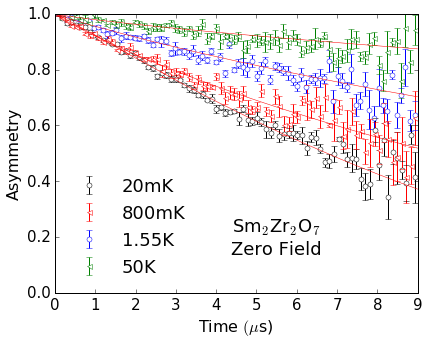

In [38]:
#GPS： here input the parameters
#GPS ZF_1.55-300K
#####################
data = data1
asytot = 0.2575; fraction=1.;
plotNo      =np.array([0,11]) #plot which datasets
datasets    =len(plotNo)#no of data sets to plot
theoryd     =datasets #no theory of data sets
binning_pts =80 # how many binning points
shiftd      =0# shift data by a value

####################
#this code is different form others, for new arragement in the file
dat        = np.zeros((datasets,binning_pts,3)) #3D arrary, page,row,col, to store the binned data
theory_len = np.size(data[~np.isnan(data[:,-1]),-1]) # the datasets*3 th col is the first theory dat
theory     = np.zeros((theory_len,theoryd*2))#  to store 5 sets of the theory dada 

#log binning data
for idx, i in enumerate(5*plotNo): 
    dat[idx,:,:]=np.transpose(lin_binning(data[:,i],(data[:,i+1]-asytot*(1-fraction))/asytot/fraction,binning_pts))
    
#shift the data and theory data sucessively
for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
    dat[i,:,1]=dat[i,:,1]+shiftd*i  
    
for idx, i in enumerate(5*plotNo):  
    theory[:,idx*2],theory[:,idx*2+1]=data[:,i+3],(data[:,i+4]-asytot*(1-fraction))/asytot/fraction+shiftd*idx

#####################
plt.figure(figsize=figsz)
fig_label=("1.55K","2.3K","2.9K",'4.1',"5.2K","7.4K","11K","16K","21K","32K","42K",'50K')
markers=("o","<",">","^","o","d")
mkeCor=("blue","green","orange")
#####################
for i, ii in enumerate(plotNo):
    i=np.int(i)
    plt.plot(theory[:,i*2],theory[:,i*2+1],color='red',linewidth=0.5)
    plt.errorbar(dat[i,:,0],dat[i,:,1],dat[i,:,2],color='black', fmt=markers[i],markersize='5',
                 mec=mkeCor[i],ecolor=mkeCor[i], mfc='white',label=fig_label[ii],zorder=1)
       
#LTF： here input the parameters
#####################
data = data2
asytot = 0.24; fraction=0.8;
plotNo      =np.array([0,8]) #plot which datasets
datasets    =len(plotNo)#no of data sets to plot
theoryd     =datasets #no theory of data sets
binning_pts =80 # how many binning points
shiftd      =0# shift data by a value

####################
#this code is different form others, for new arragement in the file
dat        = np.zeros((datasets,binning_pts,3)) #3D arrary, page,row,col, to store the binned data
theory_len = np.size(data[~np.isnan(data[:,-1]),-1]) # the datasets*3 th col is the first theory dat
theory     = np.zeros((theory_len,theoryd*2))#  to store 5 sets of the theory dada 

#log binning data
for idx, i in enumerate(5*plotNo): 
    dat[idx,:,:]=np.transpose(lin_binning(data[:,i],(data[:,i+1]-asytot*(1-fraction))/asytot/fraction,binning_pts))
    
#shift the data and theory data sucessively
for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
    dat[i,:,1]=dat[i,:,1]+shiftd*i  
    
for idx, i in enumerate(5*plotNo):  
    theory[:,idx*2],theory[:,idx*2+1]=data[:,i+3],(data[:,i+4]-asytot*(1-fraction))/asytot/fraction+shiftd*idx
    
fig_label=("20mK","100mK","200mK",'300mK',"400mK","500mK","600mK","700mK","800mK")
markers=("o","<",">","^","o","d")
mkeCor=('black','red',"blue","green","orange")
#####################
for i, ii in enumerate(plotNo):
    i=np.int(i)
    plt.plot(theory[:,i*2],theory[:,i*2+1],color='red',linewidth=0.5)
    plt.errorbar(dat[i,:,0],dat[i,:,1],dat[i,:,2],color='black', fmt=markers[i],markersize='5',
                 mec=mkeCor[i],ecolor=mkeCor[i], mfc='white',label=fig_label[ii],zorder=1)
    
ax=plt.gca() 
plt.text(5.5, 0.2,'Sm$_2$Zr$_2$O$_7$ \nZero Field',size=titfs, ha='center', va='center', backgroundcolor='white',zorder=3,bbox=dict(facecolor='white', alpha=1, edgecolor='white', boxstyle='round'))

plt.xlim(0., 9)
plt.ylim(0., 1)

plt.ylabel('Asymmetry',size=axfs)
plt.xlabel(r"Time $(\mu$s)",size=axfs)
plt.xticks( color='k', size=tickfs)
plt.yticks( color='k', size=tickfs)
#plt.minorticks_on()

plt.legend(frameon=False,numpoints=1,loc='best',fontsize=titfs)
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[2],handles[3],handles[0],handles[1]], [labels[2],labels[3],labels[0],labels[1]],
          loc='best',numpoints=1,frameon=False,framealpha=1,fontsize=legfs,fancybox=True,shadow=False)

#plt.savefig(r'D:\4_muonSR\NdSmGd2 Zr2O7 PSI Oct 2015\Sm2Zr2O7_LTF\SZO_ZF_0-50K.pdf', bbox_inches="tight",verbose=True)
plt.show()